### Statistical Learning

#### What is Statistical Learning?

More generally, suppose that we observe a quantitative response $Y$ and $p$ 
different predictors, $X_1, X_2, \ldots, X_p$. We assume that there is some 
relationship between $Y$ and $X = (X_1, X_2, \ldots, X_p)$, which can be 
written in the very general form  

\begin{equation}
Y = f(X) + \epsilon.
\tag{2.1}
\end{equation}


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from ISLP import load_data

In [5]:
# Otherwise, load CSV manually if you have it
Advertising = pd.read_csv("Advertising.csv")

In [7]:
print(Advertising.columns.tolist())

['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales']


In [9]:
X_tv = Advertising[['TV']]
X_radio = Advertising[['radio']]
X_newspaper = Advertising[['newspaper']]
y = Advertising['sales']

In [10]:
# Fit linear regression models
lm_tv = LinearRegression().fit(X_tv, y)
lm_radio = LinearRegression().fit(X_radio, y)
lm_newspaper = LinearRegression().fit(X_newspaper, y)

In [11]:
# Predictions (for regression line)
import numpy as np

In [12]:
tv_range = np.linspace(X_tv.min(), X_tv.max(), 100).reshape(-1, 1)
radio_range = np.linspace(X_radio.min(), X_radio.max(), 100).reshape(-1, 1)
newspaper_range = np.linspace(X_newspaper.min(), X_newspaper.max(), 100).reshape(-1, 1)

In [13]:
tv_pred = lm_tv.predict(tv_range)
radio_pred = lm_radio.predict(radio_range)
newspaper_pred = lm_newspaper.predict(newspaper_range)

c:\Users\Zoe Oladokun\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Zoe Oladokun\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Zoe Oladokun\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


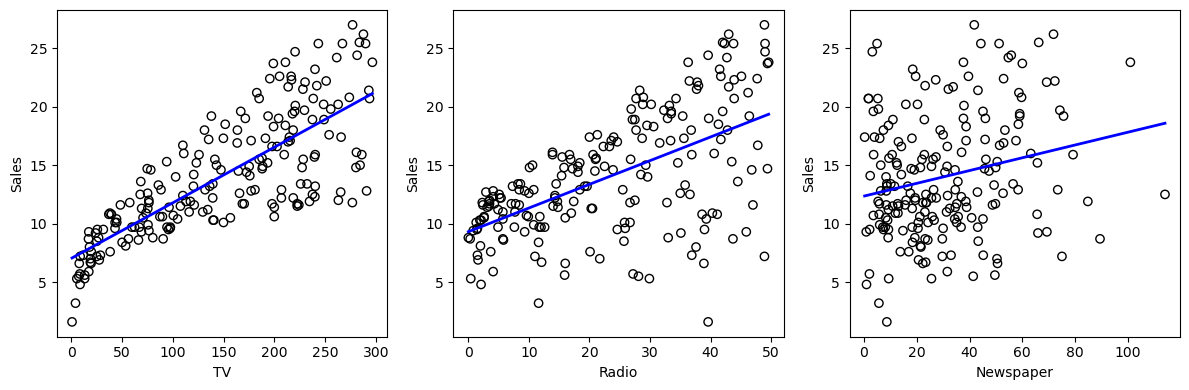

In [19]:
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# TV vs Sales
axes[0].scatter(X_tv, y, edgecolor='k', facecolor='none')
axes[0].plot(tv_range, tv_pred, color='blue', linewidth=2)
axes[0].set_xlabel("TV")
axes[0].set_ylabel("Sales")

# Radio vs Sales
axes[1].scatter(X_radio, y, edgecolor='k', facecolor='none')
axes[1].plot(radio_range, radio_pred, color='blue', linewidth=2)
axes[1].set_xlabel("Radio")
axes[1].set_ylabel("Sales")

# Newspaper vs Sales
axes[2].scatter(X_newspaper, y, edgecolor='k', facecolor='none')
axes[2].plot(newspaper_range, newspaper_pred, color='blue', linewidth=2)
axes[2].set_xlabel("Newspaper")
axes[2].set_ylabel("Sales")

plt.tight_layout()
plt.show()

##### The Income Data Set

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
# Load the Income dataset
income = load_data('Income')
X = income['Education'].values.reshape(-1, 1)
y = income['Income'].values

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Zoe Oladokun\\AppData\\Local\\anaconda3\\Lib\\site-packages\\ISLP\\data\\Income.csv'

In [ ]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

In [ ]:
# Left panel - scatter plot only
ax1.scatter(income['Education'], income['Income'], color='red', s=30)
ax1.set_xlabel('Years of Education')
ax1.set_ylabel('Income')
ax1.set_xlim(10, 22)
ax1.set_ylim(20, 80)

In [ ]:
# Right panel - scatter plot with fitted curve
ax2.scatter(income['Education'], income['Income'], color='red', s=30)

In [ ]:
# Fit polynomial curve
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

In [ ]:
# Generate smooth curve
x_smooth = np.linspace(10, 22, 100).reshape(-1, 1)
X_smooth_poly = poly.transform(x_smooth)
y_smooth = model.predict(X_smooth_poly)

In [ ]:
# Plot the fitted curve
ax2.plot(x_smooth, y_smooth, color='blue', linewidth=2)

In [ ]:
# Add residual lines
y_pred = model.predict(X_poly)
for i in range(len(income)):
    ax2.plot([X[i, 0], X[i, 0]], [y[i], y_pred[i]], 
             color='black', linestyle='--', alpha=0.6, linewidth=1)

ax2.set_xlabel('Years of Education')
ax2.set_ylabel('Income')
ax2.set_xlim(10, 22)
ax2.set_ylim(20, 80)

plt.tight_layout()
plt.show()

##### Why Estimate f?

Prediction

In many situations, a set of inputs $X$ are readily available, but the output $Y$ cannot be easily obtained. In this setting, since the error term averages to zero, we can predict $Y$ using

\begin{equation}
\hat{Y} = \hat{f}(X),
\tag{2.2}
\end{equation}

3D Income Dataset Plot

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Load the Income dataset
income = load_data('Income')
education = income['Education'].values
seniority = income['Seniority'].values
income_vals = income['Income'].values

In [ ]:
# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

In [ ]:
# Plot the observed data points (red dots)
ax.scatter(education, seniority, income_vals, color='red', s=50, alpha=0.8)

In [ ]:
# Create meshgrid for the surface
edu_range = np.linspace(education.min(), education.max(), 20)
sen_range = np.linspace(seniority.min(), seniority.max(), 20)
edu_grid, sen_grid = np.meshgrid(edu_range, sen_range)

In [ ]:
# Fit polynomial surface
X = np.column_stack([education, seniority])
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, income_vals)

In [ ]:
# Predict on grid
grid_points = np.column_stack([edu_grid.ravel(), sen_grid.ravel()])
grid_poly = poly.transform(grid_points)
income_grid = model.predict(grid_poly).reshape(edu_grid.shape)

In [ ]:
# Plot the fitted surface (blue wireframe)
ax.plot_wireframe(edu_grid, sen_grid, income_grid, color='blue', alpha=0.6, linewidth=0.8)

In [ ]:
# Set labels and title
ax.set_xlabel('Years of Education')
ax.set_ylabel('Seniority')
ax.set_zlabel('Income')
ax.set_title('FIGURE 2.3: Income as a function of Years of Education and Seniority')

In [ ]:
# Adjust viewing angle
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

Consider a given estimate $\hat{f}$ and a set of predictors $X$, which yields the prediction $\hat{Y} = \hat{f}(X)$. Assume for a moment that both $\hat{f}$ and $X$ are fixed, so that the only variability comes from $\epsilon$. Then, it is easy to show that

\begin{equation}
\begin{aligned}
\mathrm{E}(Y - \hat{Y})^2
&= \mathrm{E}[f(X) + \epsilon - \hat{f}(X)]^2 \\
&= \underbrace{[f(X) - \hat{f}(X)]^2}_\text{Reducible} + \underbrace{\mathrm{Var}(\epsilon)}_\text{Irreducible},
\end{aligned}
\tag{2.3}
\end{equation}

where $\mathrm{E}(Y - \hat{Y})^2$ represents the average, or \emph{expected value}, of the squared difference between the predicted and actual value of $Y$, and $\mathrm{Var}(\epsilon)$ represents the \emph{variance} associated with the error term $\epsilon$.